In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# Importing dataset

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [5]:
X

array([[ 2.55039813,  6.02072157],
       [-3.53791447,  2.0740551 ],
       [ 2.61052712,  2.72087181],
       ...,
       [ 2.98961129,  2.77455587],
       [ 1.79783819,  4.31479503],
       [-3.06047685,  1.7734025 ]])

In [6]:
y

array([0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0,
       2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1,

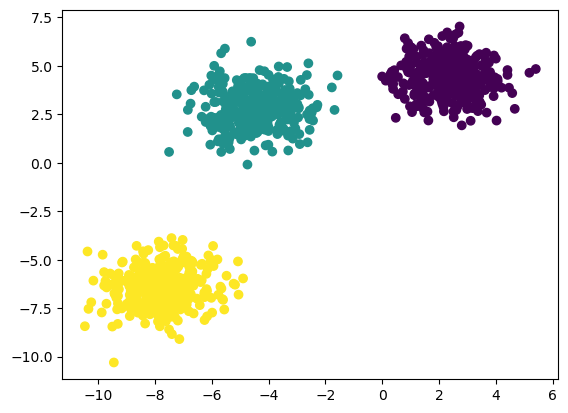

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
from sklearn.cluster import KMeans

In [28]:
import warnings
warnings.filterwarnings("ignore")

# Elbow method

In [29]:
# Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")   # Initialisation des centroîds le plus loin des données
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[1600.0000000000002,
 423.9575422316724,
 73.82025812172793,
 65.53862000527971,
 61.3489142257519,
 51.862973900130925,
 41.951657894015085,
 37.09325141768366,
 35.45061311340264,
 33.21948057914671]

# Elbow Curve

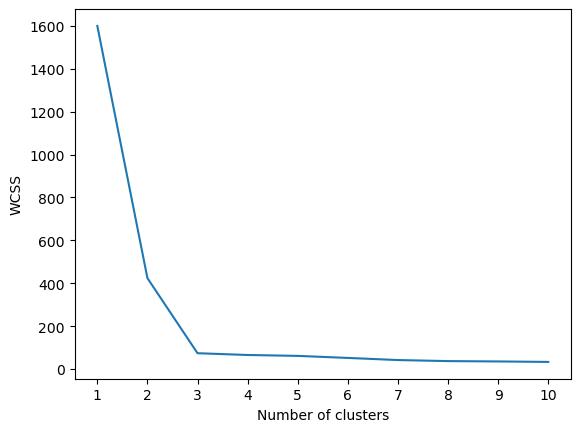

In [34]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

3 is the best K

In [35]:
kmeans=KMeans(n_clusters=3,init="k-means++")  
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [37]:
y_pred=kmeans.predict(X_test_scaled)

In [38]:
y_pred

array([2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1,
       2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2,
       0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1,
       1, 1], dtype=int32)

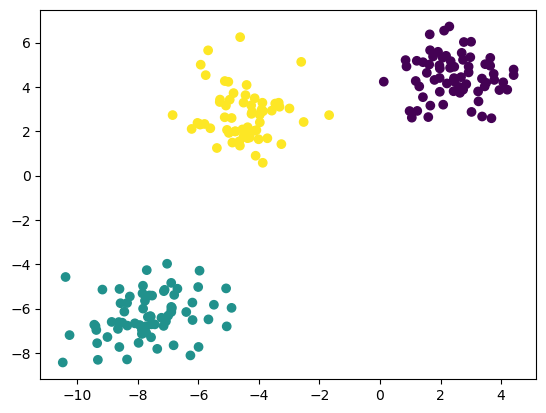

In [41]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

# Validating the k value

## kneelocator

In [43]:
#!pip install kneed

In [44]:
from kneed import KneeLocator

In [47]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [48]:
kl.elbow

np.int64(3)

## silhouette score

In [49]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [53]:
silhouette_coefficients

[np.float64(0.6806472499633327),
 np.float64(0.7772644596729927),
 np.float64(0.623679509754502),
 np.float64(0.6201894377460999),
 np.float64(0.4646453615901288),
 np.float64(0.339903164134876),
 np.float64(0.33469854448057207),
 np.float64(0.33801045504712873),
 np.float64(0.3323128856520651)]

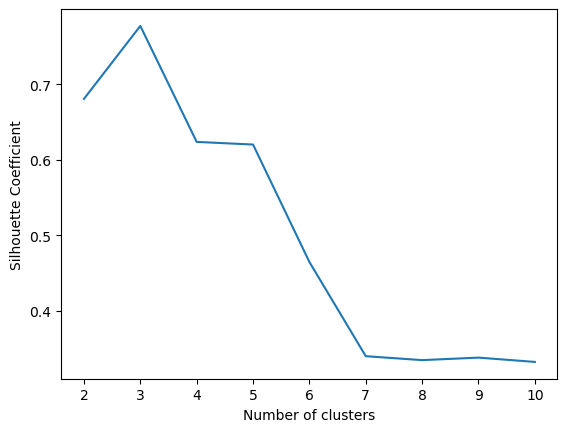

In [54]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

With kneelocator and silhouette score, we can say that 3 is the best K